In [1]:
import csv

import graph_tool.all as gt
from graph_tool.all import Graph, graph_draw, graphviz_draw

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
data = pd.read_csv("/home/sonn/Sonn/Workspace/Projects/Anti-Obesity_GBC_NetworkPharmacology/data/final/SRING.csv")

In [3]:
data.head(2)

,node1,node2,w
0,ACHE,APP,0.937
1,ACHE,CA1,0.553


In [4]:
list_nodes = []
for k in data['node1']:
    if k not in list_nodes:
        list_nodes.append(k)

for h in data['node2']:
    if h not in list_nodes:
        list_nodes.append(h)

Khởi tạo Graph

In [6]:
g = Graph(directed=False)

In [8]:
vertex_names = g.new_vertex_property("string")
edge_weights = g.new_edge_property("double")

In [9]:
vertices = []
vertices_fake = []
for i in range(len(list_nodes)):
    v = g.add_vertex()
    vertex_names[v] = list_nodes[i]  # Đặt tên cho đỉnh
    vertices.append(v)
    vertices_fake.append(list_nodes[i])

In [10]:
for i in range(len(data['w'])):
    e = g.add_edge(vertices[vertices_fake.index(data['node1'][i])],vertices[vertices_fake.index(data['node2'][i])])
    edge_weights[e] = data['w'][i] 

In [13]:
degree = g.degree_property_map("total")
ntn = 1
top_nodes = np.argsort(degree.a)[-ntn:]
top_nodes

PropertyArray([24])

In [14]:
max_degree = max(degree.a)

In [15]:
color = g.new_vertex_property("vector<float>")

In [16]:
# v là id của các đỉnh
for v in g.vertices():
    color[v] =  [0.051, 0.486, 0.4, degree[v]/max_degree]

In [17]:
vertex_text_color = g.new_vertex_property("vector<double>")

In [18]:
for v in g.vertices():
    vertex_text_color[v] = [0, 0, 0, 1]

In [24]:
pos = gt.arf_layout(g, a=1)

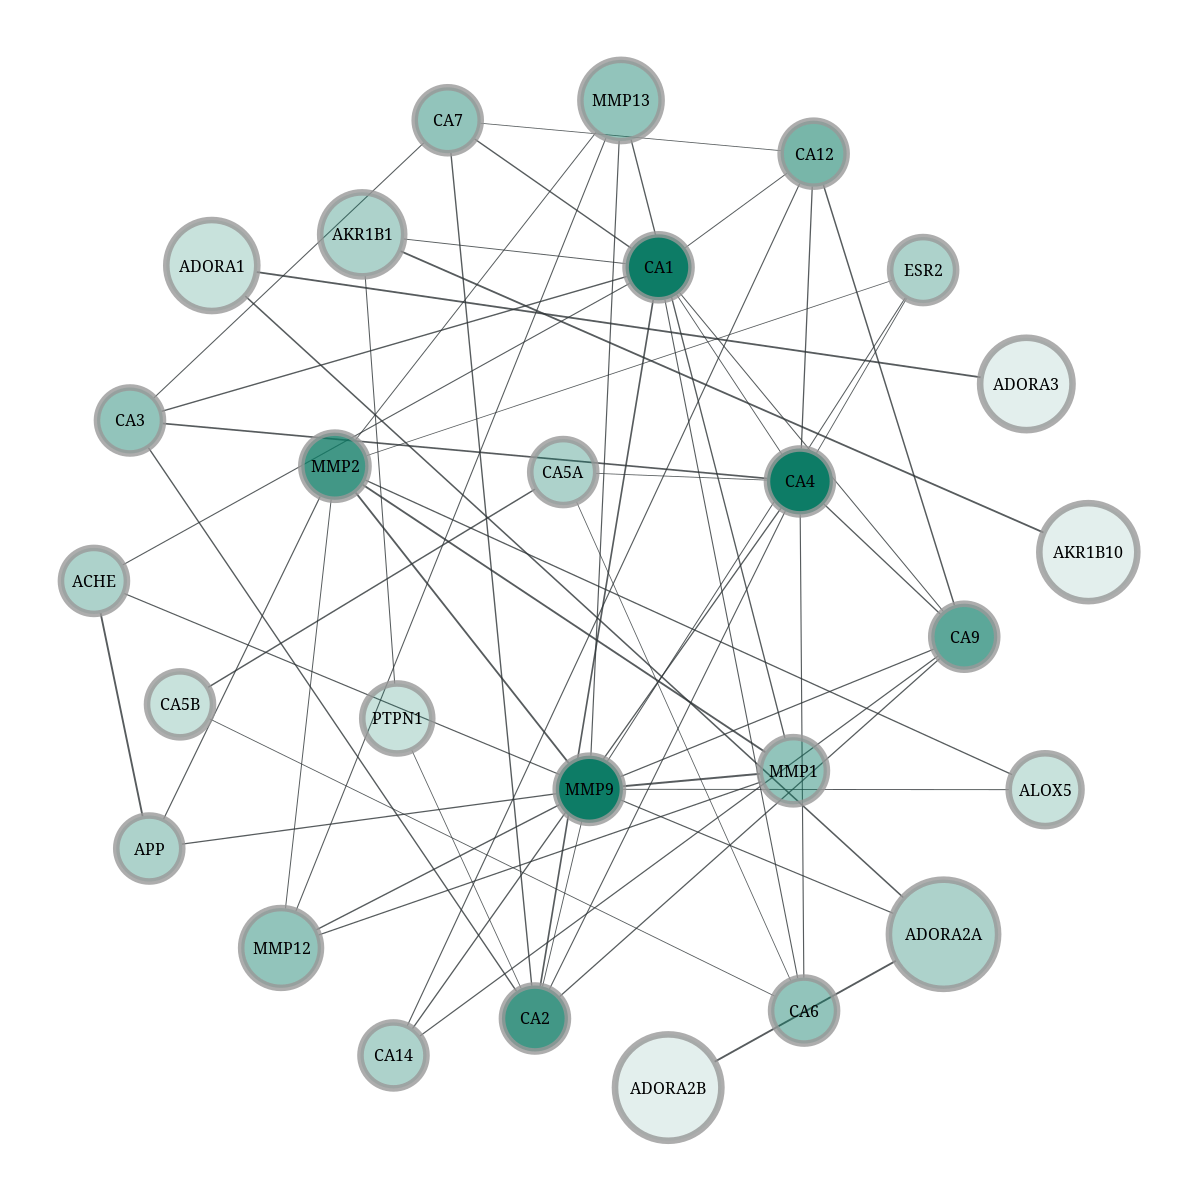

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x77b664a0d510, at 0x77b6649e8910>

In [25]:
gt.graph_draw(g, 
            vertex_text=vertex_names,
            vertex_text_color =vertex_text_color, 
            vertex_font_size=8,
            vertex_fill_color=color,
            edge_pen_width =  edge_weights,
            pos=pos,)

In [26]:
gt.interactive_window(g, 
            vertex_text=vertex_names,
            vertex_text_color =vertex_text_color, 
            vertex_font_size=8,
            vertex_fill_color=color,
            edge_pen_width =  edge_weights,
            pos=pos,)

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x77b664a0d510, at 0x77b66497c750>,
 <VertexPropertyMap object with value type 'bool', for Graph 0x77b664a0d510, at 0x77b664ba03d0>)

Tìm node có bậc cao nhất

In [35]:
import networkx as nx

In [36]:
G2 = nx.DiGraph()

G2 = nx.from_pandas_edgelist(data, source='node1', target='node2', edge_attr='w')

In [37]:
G2.nodes()

NodeView(('ACHE', 'APP', 'CA1', 'ADORA2A', 'ADORA1', 'ADORA3', 'ADORA2B', 'AKR1B1', 'PTPN1', 'AKR1B10', 'ALOX5', 'MMP2', 'MMP9', 'CA12', 'CA2', 'CA3', 'CA4', 'CA7', 'CA6', 'CA9', 'CA14', 'CA5A', 'ESR2', 'CA5B', 'MMP1', 'MMP13', 'MMP12'))

In [38]:
listn = []

In [39]:
for k in G2.nodes():
    listn.append(k)

In [41]:
de = []

In [42]:
de_n = []

In [43]:
for k in listn:
    de.append(G2.degree[k])
    de_n.append(k)
    print(G2.degree[k], k)

3 ACHE
3 APP
9 CA1
3 ADORA2A
2 ADORA1
1 ADORA3
1 ADORA2B
3 AKR1B1
2 PTPN1
1 AKR1B10
2 ALOX5
7 MMP2
9 MMP9
5 CA12
7 CA2
4 CA3
9 CA4
4 CA7
4 CA6
6 CA9
3 CA14
3 CA5A
3 ESR2
2 CA5B
4 MMP1
4 MMP13
4 MMP12


In [44]:
ntn = 5
top_nodes = np.argsort(de)[-ntn:]
top_nodes

array([14, 11, 12,  2, 16])

In [45]:
for m in top_nodes:
    print(de[m], de_n[m])

7 CA2
7 MMP2
9 MMP9
9 CA1
9 CA4


In [46]:
tn = []

In [47]:
for m in top_nodes:
    tn.append(de_n[m])

In [48]:
tn

['CA2', 'MMP2', 'MMP9', 'CA1', 'CA4']

In [50]:
dftn = pd.DataFrame(tn)

In [51]:
dftn.columns = ['TopNodes']

In [52]:
dftn.to_csv("../data/final/MainTarget.csv", index=False)